In [1]:
from pylib.LabDataAnalysis.CircuitSolvers import *
from pylib.LabDataAnalysis.DataAnalysis import *
from pylib.LabDataAnalysis.ErrorCalculations import *
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.optimize as opt

# Lab 4

## Problem 2c

In [2]:
def current_diode_eqn(I_s, T, n, V_d, e=1.60217646e-19, k=1.38e-23):
    return I_s*(np.exp(e*V_d/(n*k*T))-1)

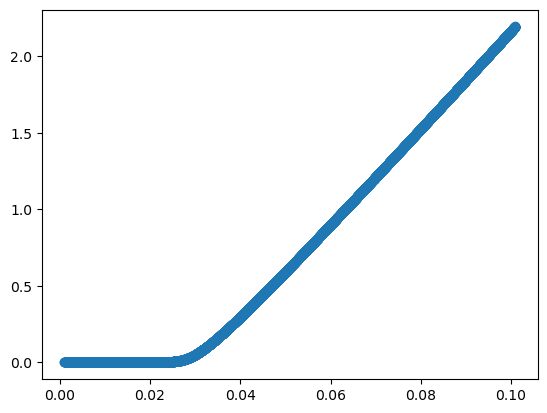

In [3]:
df = pd.read_csv("data/Lab04.2b-Scope.csv")

index = 100
plt.scatter(df["Time (s)"][index:-index], df["Channel 1 (V)"][index:-index])
plt.show()

100


/home/ayushmaan/miniconda3/envs/physics/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


Text(0, 0.5, 'Diode Current (log scale amps)')

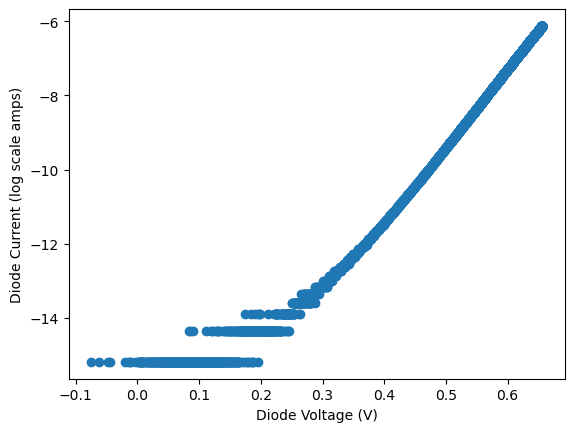

In [4]:
print(index)
x = df["Channel 2 (V)"][100:-100]
y = np.log(df["Channel 1 (V)"][100:-100]/1e3)
plt.scatter(x, y)
plt.xlabel("Diode Voltage (V)")
plt.ylabel("Diode Current (log scale amps)")

In [5]:
index = np.argmin(np.abs(df["Channel 2 (V)"]-.3))
print(df["Channel 2 (V)"][index])

0.300253590580094


20.840230200037528 -19.798059875218865


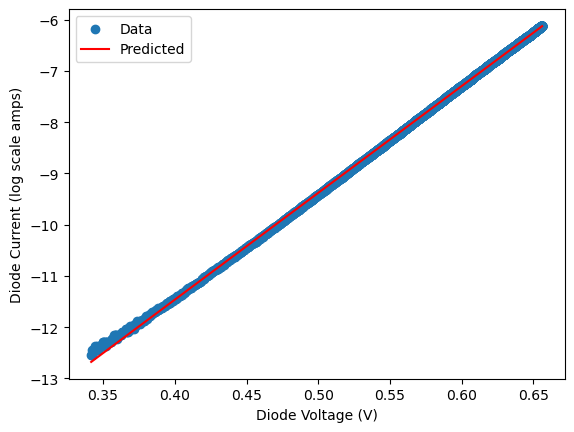

In [6]:

x = df["Channel 2 (V)"][100+index:-100]
y = np.log(df["Channel 1 (V)"][100+index:-100]/1e3)
plt.scatter(x, y, label="Data")
m, c = opt.curve_fit(lambda x, m, c: x*m + c, list(x), list(y))[0]
plt.plot(x, x*m + c, color="r", label="Predicted")
plt.xlabel("Diode Voltage (V)")
plt.ylabel("Diode Current (log scale amps)")
plt.legend()
print(m, c)

In [7]:
n = 1/(m*25.7e-3)
print(n)
I_s = np.exp(c)
print(I_s)

1.8670861820185558
2.522387722194488e-09


In [8]:
voltages = np.array([0.4, 0.5, 0.6])
indices =  [np.argmin(np.abs(df["Channel 2 (V)"]-v)) for v in voltages]
current = df["Channel 1 (V)"]/1e3

act = list(current[indices])
pred = current_diode_eqn(I_s, 293, n, voltages)

print(pred)
print(act)

[1.22594660e-05 1.02385266e-04 8.54937064e-04]
[1.09387721292072e-05, 8.14008697067609e-05, 0.0006768222914166112]


## Problem 4.2e

In [9]:
df = pd.read_csv("data/lab4prob2edata_roomtemp.csv")
df

,Time (s),Channel 1 (V),Channel 2 (V)
0,-0.000212,2.218743,0.651894
1,-0.000200,2.219756,0.651555
2,-0.000188,2.220094,0.651555
3,-0.000175,2.220770,0.651555
4,-0.000162,2.221108,0.651555
...,...,...,...
8187,0.102125,-0.001789,-0.497411
8188,0.102138,-0.001789,-0.497411
8189,0.102150,-0.001789,-0.496733
8190,0.102163,-0.001789,-0.495379


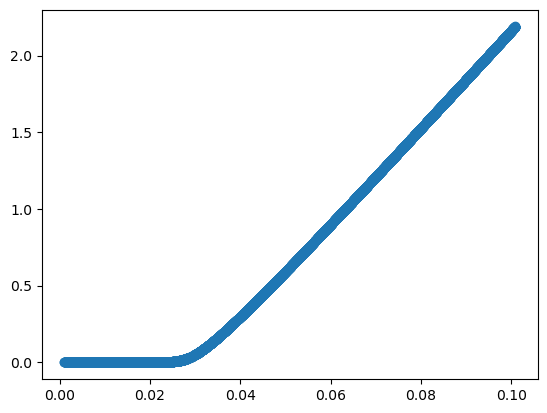

In [10]:
index = 100
plt.scatter(df["Time (s)"][index:-index], df["Channel 1 (V)"][index:-index])

100


/home/ayushmaan/miniconda3/envs/physics/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


Text(0, 0.5, 'Diode Current (log scale amps)')

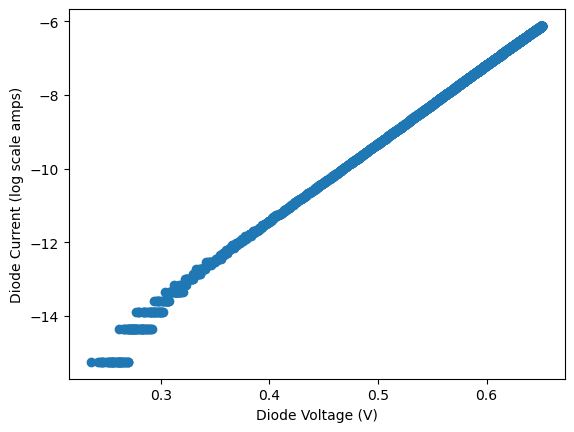

In [11]:
print(index)
x = df["Channel 2 (V)"][100:-100]
y = np.log(df["Channel 1 (V)"][100:-100]/1e3)
plt.scatter(x, y)
plt.xlabel("Diode Voltage (V)")
plt.ylabel("Diode Current (log scale amps)")

In [12]:
index = np.argmin(np.abs(df["Channel 2 (V)"]-.3))
print(df["Channel 2 (V)"][index])

0.2997203618983166


21.182656974944443 -19.903193788730512


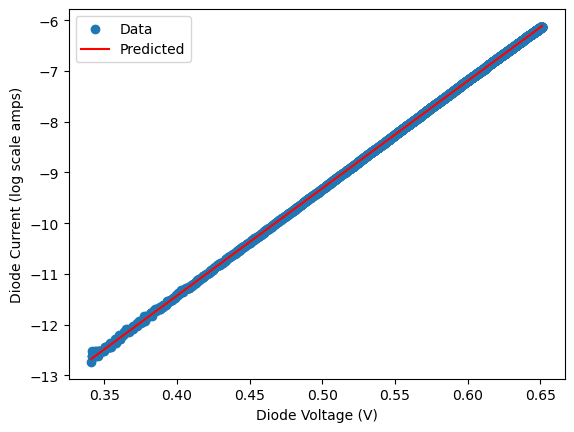

In [13]:

x = df["Channel 2 (V)"][100+index:-100]
y = np.log(df["Channel 1 (V)"][100+index:-100]/1e3)
plt.scatter(x, y, label="Data")
m, c = opt.curve_fit(lambda x, m, c: x*m + c, list(x), list(y))[0]
plt.plot(x, x*m + c, color="r", label="Predicted")
plt.xlabel("Diode Voltage (V)")
plt.ylabel("Diode Current (log scale amps)")
plt.legend()
print(m, c)

In [14]:
n = 1/(m*25.7e-3)
print(n)
I_s = np.exp(c)
print(I_s)

1.83690392959677
2.2706634288880615e-09


In [15]:
voltages = np.array([0.4, 0.5, 0.6])
indices =  [np.argmin(np.abs(df["Channel 2 (V)"]-v)) for v in voltages]
current = df["Channel 1 (V)"]/1e3

act = list(current[indices])
pred = current_diode_eqn(I_s, 293, n, voltages)

print(pred)
print(act)

[1.26882360e-05 1.09723973e-04 9.48726479e-04]
[1.1050519e-05, 8.8762359e-05, 0.0007499887560728741]


In [16]:
df_ln = pd.read_csv("data/lab4prob2e-withnitrogendata.csv")
df_ln

,Time (s),Channel 1 (V),Channel 2 (V)
0,-0.000200,1.834914,1.053846
1,-0.000188,1.835589,1.053846
2,-0.000175,1.835589,1.053507
3,-0.000162,1.835927,1.053507
4,-0.000150,1.836603,1.053846
...,...,...,...
8187,0.102138,-0.001789,-0.497749
8188,0.102150,-0.002127,-0.497072
8189,0.102163,-0.002127,-0.497072
8190,0.102175,-0.001789,-0.496056


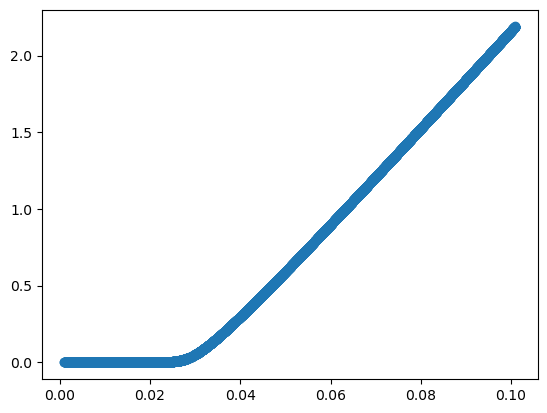

In [17]:
index = 100
plt.scatter(df_ln["Time (s)"][index:-index], df["Channel 1 (V)"][index:-index])

100


/home/ayushmaan/miniconda3/envs/physics/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


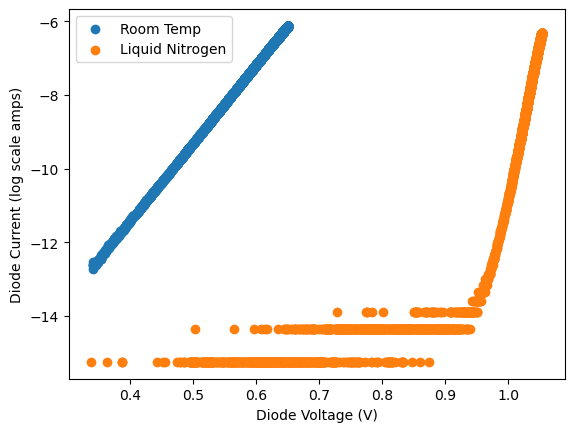

In [18]:
print(index)
x_ln = df_ln["Channel 2 (V)"][100:-100]
y_ln = np.log(df_ln["Channel 1 (V)"][100:-100]/1e3)
plt.scatter(x, y, label="Room Temp")
plt.scatter(x_ln, y_ln, label="Liquid Nitrogen")
plt.xlabel("Diode Voltage (V)")
plt.ylabel("Diode Current (log scale amps)")
plt.legend()

In [19]:
index = np.argmin(np.abs(df_ln["Channel 2 (V)"]-.3))
print(df_ln["Channel 2 (V)"][index])

0.3000589902271398


85.12473510928328 -95.93909694029117


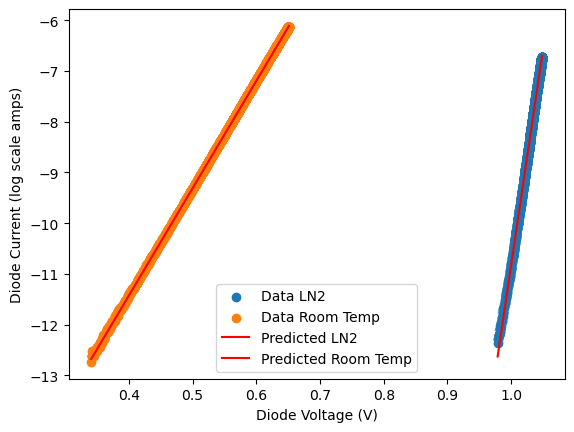

In [20]:
index_cutoff= 1600
x_ln = df_ln["Channel 2 (V)"][index_cutoff+index:-index_cutoff]
y_ln = np.log(df_ln["Channel 1 (V)"][index_cutoff+index:-index_cutoff]/1e3)
plt.scatter(x_ln, y_ln, label="Data LN2")
plt.scatter(x, y, label="Data Room Temp")
m_ln, c_ln = opt.curve_fit(lambda x, m, c: x*m + c, list(x_ln), list(y_ln))[0]
plt.plot(x_ln, x_ln*m_ln + c_ln, color="r", label="Predicted LN2")
plt.plot(x, x*m + c, color="r", label="Predicted Room Temp")
plt.xlabel("Diode Voltage (V)")
plt.ylabel("Diode Current (log scale amps)")
plt.legend()
print(m_ln, c_ln)

In [21]:
V_t = 8.62e-5*77
n = 1/(m_ln*V_t)
print(n)
I_s = np.exp(c_ln)
print(I_s)

1.7698898371691405
2.158636916800039e-42


In [22]:
voltages = np.array([0.4, 0.5, 0.6])
indices =  [np.argmin(np.abs(df["Channel 2 (V)"]-v)) for v in voltages]
current = df["Channel 1 (V)"]/1e3

act = list(current[indices])
pred = current_diode(I_s, 293, n, voltages)

print(pred)
print(act)

NameError: name 'current_diode' is not defined

## Problem 4.3a

In [ ]:
voltages = [0.6, 1.0, 3.0, 5.0]
voltage_resistor = [.108, .424, 2.252, 4.126]
voltage_diode = [.512, .582, .664, 0.694]
act_voltages = np.add(voltage_resistor, voltage_diode)
current_diode = np.divide(voltage_resistor, 1e3)
print(f"Voltage Resistor: {voltage_resistor}")
print(f"Voltage Diode: {voltage_diode}")
print(f"Current Diode: {current_diode}")
print(f"Actual Voltage From Wavegen: {act_voltages}")

Voltage Resistor: [0.108, 0.424, 2.252, 4.126]
Voltage Diode: [0.512, 0.582, 0.664, 0.694]
Current Diode: [0.000108 0.000424 0.002252 0.004126]
Actual Voltage From Wavegen: [0.62  1.006 2.916 4.82 ]


In [ ]:
voltages = [1.0, 3.0, 5.0]
voltage_resistor = [.538, 2.456, 4.418]
voltage_diode = [.486, .560, 0.586]
act_voltages = np.add(voltage_resistor, voltage_diode)
current_diode = np.divide(voltage_resistor, 1e3)
print(f"Voltage Resistor: {voltage_resistor}")
print(f"Voltage Diode: {voltage_diode}")
print(f"Current Diode: {current_diode}")
print(f"Actual Voltage From Wavegen: {act_voltages}")

Voltage Resistor: [0.538, 2.456, 4.418]
Voltage Diode: [0.486, 0.56, 0.586]
Current Diode: [0.000538 0.002456 0.004418]
Actual Voltage From Wavegen: [1.024 3.016 5.004]


## Problem 4.3c

In [ ]:
def load_line(x, V_dd, R):
    slope = (0-V_dd/R)/V_dd
    intercept = V_dd/R
    return slope*x + intercept

In [ ]:
voltage = np.linspace(0, 0.7, 1000)
current = voltage/1e3
load = load_line(voltage, 3.0, 1e3)
current_diode = current_diode_eqn(2.522387722194488e-09, 293, 1.8670861820185558, voltage)

0.6474474474474474 0.0023525525525525527


Text(0, 0.5, 'Current (A)')

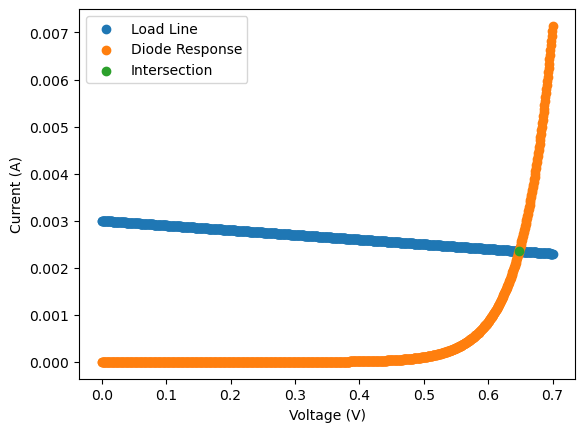

In [ ]:
plt.scatter(voltage, load, label="Load Line")
plt.scatter(voltage, current_diode, label="Diode Response")
index = np.argmin(np.abs(load - current_diode))
print(voltage[index], load[index])
plt.scatter(voltage[index], load[index], label="Intersection")
plt.legend()
plt.xlabel("Voltage (V)")
plt.ylabel("Current (A)")

In [ ]:
function1 = lambda V_0: V_0/1e3
function2 = lambda I: (1.8670*25.7e-3)*np.log(1+(I/2.522387722194488e-09))
guess = 2e-3
val_1 = guess
for _ in range(10):
    val_2 = function2(val_1)
    val_1 = function1((3.0-val_2))
    print(val_1, val_2)

0.0023482401146764803 0.6517598853235198
0.002340538118020126 0.6594618819798745
0.002340695752418597 0.6593042475814028
0.00234069252096723 0.6593074790327701
0.0023406925872086954 0.6593074127913049
0.0023406925858508116 0.6593074141491885
0.0023406925858786465 0.6593074141213532
0.002340692585878076 0.6593074141219238
0.002340692585878088 0.6593074141219122
0.0023406925858780875 0.6593074141219124


In [ ]:
root_function = lambda voltage: load_line(voltage, 3.0, 1e3)-current_diode_eqn(2.522387722194488e-09, 293, 1.8670861820185558, voltage)
voltage = opt.fsolve(root_function, 0.7)
current = load_line(voltage, 3.0, 1e3)
print(voltage, current)

[0.64769074] [0.00235231]


## Problem 4.4a

In [ ]:
current_dc = 3.1908/1e3
print(current_dc)
current_ac = 0.92805/1e3
print(current_ac)


0.0031907999999999997
0.00092805


In [ ]:
r_d_1 = 14.992e-3/current_ac
print(r_d_1)

16.154302031140563


## Problem 4.4b

In [ ]:
current_dc = 3.4394/10e3
print(current_dc)
current_ac = 0.97573/10e3
print(current_ac)


0.00034394
9.7573e-05


In [ ]:
r_d_2 = 13.644e-3/current_ac
print(r_d_2)

139.83376548840357


## Problem 4.4c

In [ ]:
print(f"Predicted Ratio is: {}")
print(f"Actual Ratio is: {14.992e-3/13.644e-3}")

Predicted Ratio is: 1.153+/-0.016
Actual Ratio is: 1.0987980064497216


In [ ]:
G_1 = 14.992e-3
G_2 = 13.644e-3
G_1_pred = (r_d_1/(resistance_err(1e3)+r_d_1))
G_2_pred = r_d_2/(resistance_err(10e3)+r_d_2)
print(f"The gain for the 1k Ohm resistor is: predicted {G_1_pred} actual {G_1}")
print(f"The gain for the 10k Ohm resistor is: predicted {G_2_pred} actual {G_2}")

The gain for the 1k Ohm resistor is: predicted 0.01590+/-0.00016 actual 0.014992
The gain for the 10k Ohm resistor is: predicted 0.01379+/-0.00014 actual 0.013644


## Problem 4.5b

In [ ]:
I_before = 5.89/1e3
I_after = 5.898/1e3 - 6.2/10e3
print(I_before, I_after)
print((6.2-6.204)/(I_after - I_before))

0.005889999999999999 0.005278
6.535947712417584


In [ ]:
I = 12/(6.535 + 1e3)
print(I**2 *1e3)

0.1421362096390679


In [ ]:
(12 - (12/6.204)*6.2)*10e3

77.36943907156402

In [ ]:
77.369*6.204/(12-6.204)

82.81526501035196

In [ ]:
12/(77.369 + 82.815)

0.0749138490735654

In [ ]:
0.0749138490735654**2*82.815

0.4647648013055475

In [1]:
0.0749138490735654**2 * 77.4


0.4343753622055108

## Problem 4.6

In [ ]:
print(f"The resistance required is {(5-1.5)/10e-3}")

The resistance required is 350.0


In [ ]:
(5-1.94)/10e-3

306.0

In [ ]:
(5-1.94)/330

0.009272727272727273

In [ ]:
(24-1.938)/100e3

0.00022062

## Problem 4.7a

In [ ]:
2.4885 - 1.9466

0.5419

In [ ]:
root_function = lambda voltage: load_line(voltage, 2.5, 1e3)-current_diode_eqn(2.522387722194488e-09, 293, 1.8670861820185558, voltage)
voltage = opt.fsolve(root_function, 0.7)
current = load_line(voltage, 2.5, 1e3)
print(voltage, current)

In [30]:
2.5/(100*10e3*10e-6)

0.25

In [31]:
2.5/(200*10e3*10e-6)

0.125